# Telco Churn Analysis and Modeling

#### Problem Statement

There are promotional charges called as Acquisition Cost and Retention Cost in a telco company. The cost of acquiring new consumers is referred to as acquisition cost. Meanwhile, the expense of retaining existing clients is known as Retention Cost.

We are frequently inaccurate in our predictions of which customers would churn and which ones will stay due to human limitations. As a result, the allocation of money may be incorrect, resulting in a higher amount of funds being issued.

Moreover, according to some sources, the acquisition cost is 5x greater than the retantion cost. If we are wrong in predicting a customer who will actually churn, but it turns out that we predict as a customer who will retain, then we need to spend more than it should be.

#### What to do

I will try to create a Machine Learning model to predict customer churn and retantion.

#### Goal

Machine Learning has a goal so that cost allocation can be done as precisely as possible.

#### Value

There is no wasted cost allocation.

Make sure you have installed xgbost by-
``` pip install xgboost ```  in command line promt or in anconda prompt 

In [1]:
# Importing the libraries
import pandas as pd # load ans manipulate data and one hot encoding
import numpy as np # Calculate the mean and std
import xgboost as xgb # xgboost stuff
from sklearn.model_selection import train_test_split #Splitting data into training and test set
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, make_scorer # for evaluating performace of model (Imbalance data)
from sklearn.model_selection import GridSearchCV # for cross validation 
from sklearn.metrics import confusion_matrix, plot_confusion_matrix # Creating confusion metrics, and plotting it
import matplotlib.pyplot as plt #visualizing the graph
import seaborn as sns # visualizing the graph
pd.set_option('display.max_columns', 500) # for displaying all the columns

### Import the dataset
Now we will import the data set from https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

In [2]:
# load the dataset in df and lest look at the first 5 rows of df
df= pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [3]:
# Lets look at the shape of dataset
df.shape

(7043, 33)

In [4]:
# Lets describe the dataset
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [5]:
# Lets look at the data type of each columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

So, Df dataset contains 7043 rows , 33 columns 

## Data Pre-processing

##### People already left the elco compant so, we will remove these columns from data set. 

In [6]:
# Removing these columns so, we did axis=1, and inplace= True, means not making the copy of dataset
df.drop(['Churn Reason','CLTV','Churn Score','Churn Label'], axis=1, inplace= True)
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


Some of columns contains only single values which From the dataframe above, there are several columns that have one unique value, namely the column [Count, Country, State]. In addition, I will not use the CustomerID column because the customerID does not determine the probability that someone will churn or not.

Zip code, Lat Long, Latitude, Longitude will also be deleted. I won't use it to build Machine Learning.

In [7]:
df['Count'].unique()

array([1], dtype=int64)

In [8]:
df['Country'].unique()

array(['United States'], dtype=object)

In [9]:
df['State'].unique()

array(['California'], dtype=object)

In [10]:
df.drop(['Count','City','Country','State','CustomerID','Zip Code', 'Lat Long', 'Latitude', 'Longitude'],
       axis=1, inplace= True)
# Lets see first 5 rows 
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,1


In [11]:
# Replacing the space from column name 
df.columns= df.columns.str.replace(' ','_') #replacing space with undescore
df.columns

Index(['Gender', 'Senior_Citizen', 'Partner', 'Dependents', 'Tenure_Months',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service',
       'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support',
       'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charges', 'Total_Charges', 'Churn_Value'],
      dtype='object')

In [12]:
# Now replacing white spaces with underscore
df.replace(' ', '_', regex=True, inplace =True)
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.5,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.3,1


In [13]:
# checking missing values 
df.isnull().sum()

Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure_Months        0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn_Value          0
dtype: int64

 ##### We donot find any missing values 

In [14]:
# Lets see the dataype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior_Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure_Months      7043 non-null   int64  
 5   Phone_Service      7043 non-null   object 
 6   Multiple_Lines     7043 non-null   object 
 7   Internet_Service   7043 non-null   object 
 8   Online_Security    7043 non-null   object 
 9   Online_Backup      7043 non-null   object 
 10  Device_Protection  7043 non-null   object 
 11  Tech_Support       7043 non-null   object 
 12  Streaming_TV       7043 non-null   object 
 13  Streaming_Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless_Billing  7043 non-null   object 
 16  Payment_Method     7043 

In [15]:
# Lets look at the column of df['Total_Charges']
df[df['Total_Charges']=="_"]

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
2234,Female,No,Yes,No,0,No,No_phone_service,DSL,Yes,No,Yes,Yes,Yes,No,Two_year,Yes,Bank_transfer_(automatic),52.55,_,0
2438,Male,No,No,No,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.25,_,0
2568,Female,No,Yes,No,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two_year,No,Mailed_check,80.85,_,0
2667,Male,No,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.75,_,0
2856,Female,No,Yes,No,0,No,No_phone_service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two_year,No,Credit_card_(automatic),56.05,_,0
4331,Male,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,19.85,_,0
4687,Male,No,Yes,Yes,0,Yes,Yes,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,25.35,_,0
5104,Female,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,Two_year,No,Mailed_check,20.00,_,0
5719,Male,No,Yes,Yes,0,Yes,No,No,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,No_internet_service,One_year,Yes,Mailed_check,19.70,_,0
6772,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two_year,No,Mailed_check,73.35,_,0


In [16]:
# replacing the colum Total_Charges with zero
df['Total_Charges']= np.where(df['Total_Charges']=="_",0,df['Total_Charges'])

In [17]:
# lets change the datatype of column Total_Charges to numeric
df['Total_Charges']= pd.to_numeric(df['Total_Charges'])
df['Total_Charges'].dtype


dtype('float64')

## EDA 
The preliminary analysis of data to discover relationships between measures in the data and to gain an insight on the trends, patterns, and relationships among various entities present in the data set with the help of statistics and visualization tools is called Exploratory Data Analysis (EDA). 


### Univariate analysis:
Uni means one and variate means variable, so in univariate analysis, there is only one dependable variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

In [18]:
df['Churn_Value'].unique()

array([1, 0], dtype=int64)

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Churn_Value', ylabel='count'>

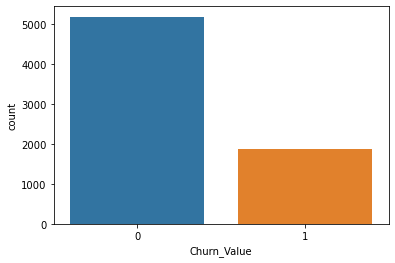

In [19]:
# Lets visualize the Churn_Value column
sns.countplot(df['Churn_Value'])

In [20]:
df['Churn_Value'].value_counts()

0    5174
1    1869
Name: Churn_Value, dtype: int64

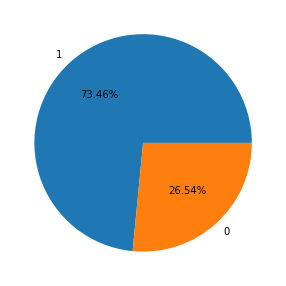

In [21]:
plt.figure(figsize=(10,5))
plt.pie(df['Churn_Value'].value_counts(), labels=df['Churn_Value'].unique(), autopct='%.2f%%')
plt.show()

By looking at columns df['Churn_Value'] we conclude thata data are imbalance, we have to handle the imbalnce data before building the machine learning model

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Male counts Vs female count ')

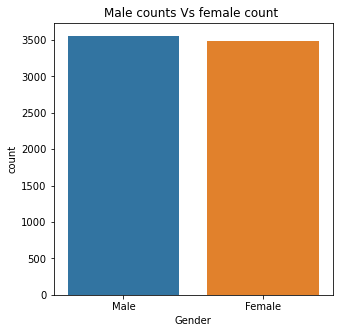

In [22]:
plt.figure(figsize=(5,5))
sns.countplot(df.Gender)
plt.title('Male counts Vs female count ')

Text(0.5, 1.0, 'Histogram of Monthly_Charges')

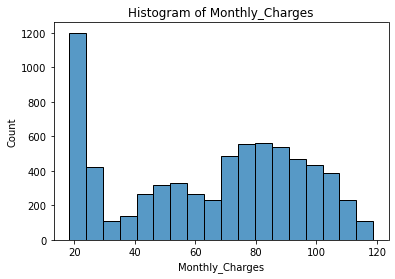

In [23]:

sns.histplot(df.Monthly_Charges)
plt.title('Histogram of Monthly_Charges')

C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Bar plot of Senior_Citizen ')

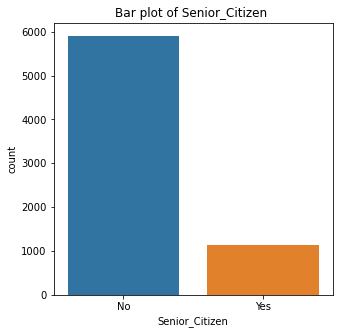

In [24]:
plt.figure(figsize=(5,5))
sns.countplot(df.Senior_Citizen)
plt.title('Bar plot of Senior_Citizen ')

### Bivariate Analysis
Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis


In [25]:
# column Senior_Citizen
df['Senior_Citizen'].value_counts()

No     5901
Yes    1142
Name: Senior_Citizen, dtype: int64

<Figure size 576x432 with 0 Axes>

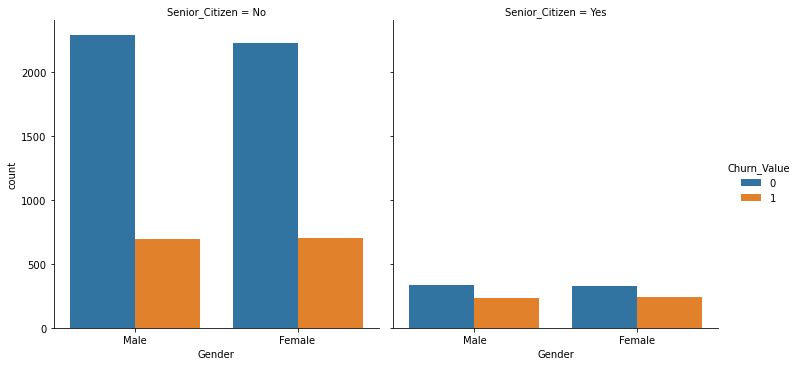

In [26]:
plt.figure(figsize=(8,6))
sns.catplot(x='Gender', hue='Churn_Value', col='Senior_Citizen', kind='count', data=df)

From the visualization above, we can see that the churn and retain ratio for senior citizens, both male and female, is almost the same. Likewise, the churn and retain ratio for non-senior citizens. But if we look, the churn ratio has increased in senior citizens when compared to non-senior citizens.

In [27]:
by_gender_senior = df.groupby(['Senior_Citizen', 'Gender'])['Churn_Value'].value_counts(normalize=True).to_frame().rename(columns={'Churn_Value': 'Ratio'}).reset_index().sort_values('Senior_Citizen')
by_gender_senior


,Senior_Citizen,Gender,Churn_Value,Ratio
0,No,Female,0,0.760616
1,No,Female,1,0.239384
2,No,Male,0,0.767192
3,No,Male,1,0.232808
4,Yes,Female,0,0.577465
5,Yes,Female,1,0.422535
6,Yes,Male,0,0.588850
7,Yes,Male,1,0.411150


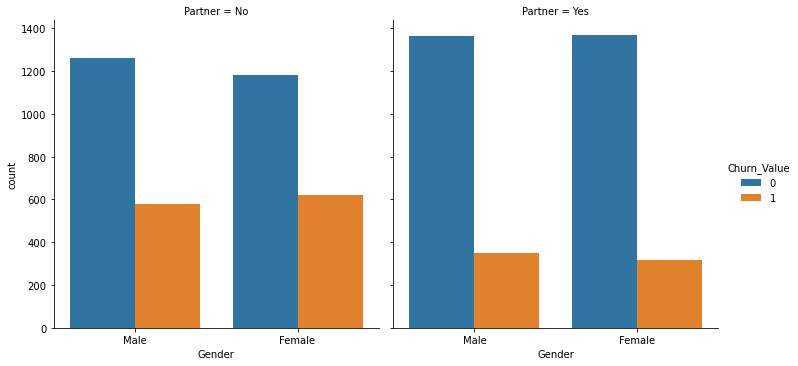

In [28]:
sns.catplot(x= 'Gender', hue= 'Churn_Value',col='Partner', kind= 'count', data= df)

From the visualization above, both female and male who do not have a partner are more likely to churn.

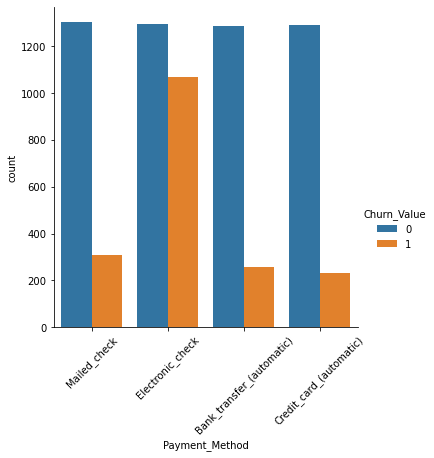

In [29]:
sns.catplot(x='Payment_Method', hue='Churn_Value', kind='count', data=df)
plt.xticks(rotation=45)
plt.show()

In [30]:
pd.crosstab(df['Payment_Method'], df['Churn_Value'], normalize=0)

Churn_Value,0,1
Payment_Method,,
Bank_transfer_(automatic),0.832902,0.167098
Credit_card_(automatic),0.847569,0.152431
Electronic_check,0.547146,0.452854
Mailed_check,0.808933,0.191067


C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rohit Kumar (Prince)\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

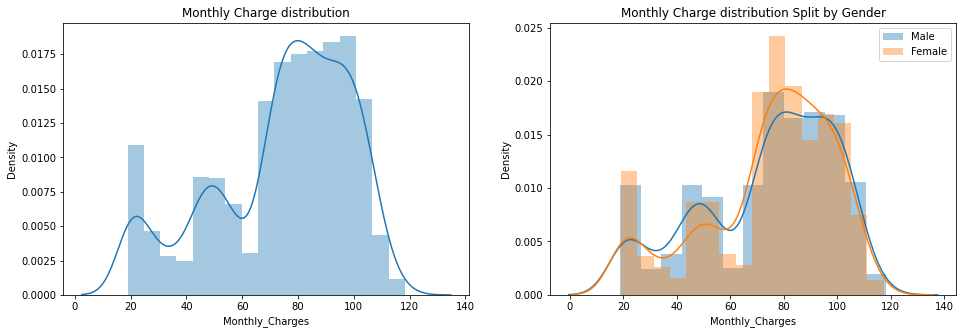

In [31]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.title('Monthly Charge distribution')
sns.distplot(df[df['Churn_Value'] == 1]['Monthly_Charges'], label='Churn')
plt.subplot(1,2,2)
plt.title('Monthly Charge distribution Split by Gender')
sns.distplot(df[(df['Churn_Value'] == 1) & (df['Gender'] == 'Male')]['Monthly_Charges'], label='Male')
sns.distplot(df[(df['Churn_Value'] == 1) & (df['Gender'] == 'Female')]['Monthly_Charges'], label='Female')
plt.legend()
plt.show()

From the visualization above, the odds between men and women to churn is almost the same in every level of monthly charges.

In [32]:
df.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30,1


In [33]:
# Creating independent and depedent variable 
X= df.iloc[:,:-1] #Independent variable 
y= df['Churn_Value'] ## Dependent variable
X.head()

,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed_check,53.85,108.15
1,Female,No,No,Yes,2,Yes,No,Fiber_optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic_check,70.70,151.65
2,Female,No,No,Yes,8,Yes,Yes,Fiber_optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic_check,99.65,820.50
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber_optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic_check,104.80,3046.05
4,Male,No,No,Yes,49,Yes,Yes,Fiber_optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank_transfer_(automatic),103.70,5036.30


### Feature Engineering 
- ```One_hot_encoding``` will do for the nominal data:We cannot Rank the data, Example like zip-code
- ```Lavel_encoding``` we do for ordinal data : we can give a rank , example like Grade, education status

We doing here **One_hot_encoding** Because machine learning algorithm understand only numerical data, and we have some of predictor are categorical type data we will use ```get_dummies()```|

In [34]:
X_encoded= pd.get_dummies(X,columns=['Gender','Senior_Citizen','Partner','Dependents','Phone_Service',
                                    'Multiple_Lines','Internet_Service','Online_Security','Online_Backup',
                                    'Device_Protection','Tech_Support','Streaming_TV','Contract','Paperless_Billing',
                                    'Payment_Method','Streaming_Movies'])

In [35]:
X_encoded.head()

,Tenure_Months,Monthly_Charges,Total_Charges,Gender_Female,Gender_Male,Senior_Citizen_No,Senior_Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone_Service_No,Phone_Service_Yes,Multiple_Lines_No,Multiple_Lines_No_phone_service,Multiple_Lines_Yes,Internet_Service_DSL,Internet_Service_Fiber_optic,Internet_Service_No,Online_Security_No,Online_Security_No_internet_service,Online_Security_Yes,Online_Backup_No,Online_Backup_No_internet_service,Online_Backup_Yes,Device_Protection_No,Device_Protection_No_internet_service,Device_Protection_Yes,Tech_Support_No,Tech_Support_No_internet_service,Tech_Support_Yes,Streaming_TV_No,Streaming_TV_No_internet_service,Streaming_TV_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,Paperless_Billing_No,Paperless_Billing_Yes,Payment_Method_Bank_transfer_(automatic),Payment_Method_Credit_card_(automatic),Payment_Method_Electronic_check,Payment_Method_Mailed_check,Streaming_Movies_No,Streaming_Movies_No_internet_service,Streaming_Movies_Yes
0,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0
1,2,70.70,151.65,1,0,1,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,8,99.65,820.50,1,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,28,104.80,3046.05,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1
4,49,103.70,5036.30,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1


In [36]:
X=X_encoded.copy()
X.shape

(7043, 46)

## Building a XGBoost model

#### The XGBoost Advantage
I’ve always admired the boosting capabilities that this algorithm infuses in a predictive model. When I explored more about its performance and science behind its high accuracy, I discovered many advantages:

#### Regularization:
- Standard GBM implementation has no regularization like XGBoost, therefore it also helps to reduce overfitting.
- In fact, XGBoost is also known as a ‘regularized boosting‘ technique.


We willsplit the data into traing and tesing set, but before going to split lets see how much percentage of people leaving the company, We will do simply by adding all the **y=1** values divided by total lenght of dtat 

In [37]:
sum(y)/len(y)

0.2653698707936959

**So, see that only 27% of poeple are left the company, so it conclude the dataset are preety much imbalanced**

In [38]:
# Spliting the data
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=42,stratify=y)

Now lets verify that ```stratify``` worked as expected.

In [39]:
sum(y_train)/len(y_train)

0.2654297614539947

In [40]:
sum(y_test)/len(y_test)

0.26519023282226006

verify that ```stratify``` worked as expected, y_train and y_test has same percentage

In [41]:
# Lets build the Xgboost model without cross validation
clf_xgb= xgb.XGBClassifier(objective='binary:logistic',max_depth=5,learning_rate= 0.1,
                           colsample_bytree = 0.5,
                           subsample=0.90, reg_lambda= 10,use_label_encoder=False)


In [42]:
#fitting the model
# Here early_stopping_rounds=10: means if te prediction is not improving after building 10 more tree
#if none of 10 build tree not improving the prediction then,it will stop
clf_xgb.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.59281
[1]	validation_0-aucpr:0.60752
[2]	validation_0-aucpr:0.61600
[3]	validation_0-aucpr:0.64896
[4]	validation_0-aucpr:0.65489
[5]	validation_0-aucpr:0.65807
[6]	validation_0-aucpr:0.65623
[7]	validation_0-aucpr:0.65691
[8]	validation_0-aucpr:0.65602
[9]	validation_0-aucpr:0.65662
[10]	validation_0-aucpr:0.65586
[11]	validation_0-aucpr:0.64999
[12]	validation_0-aucpr:0.64981
[13]	validation_0-aucpr:0.65280
[14]	validation_0-aucpr:0.65484
[15]	validation_0-aucpr:0.65365


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=10, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [43]:
# Predicting the model
y_pred= clf_xgb.predict(X_test)

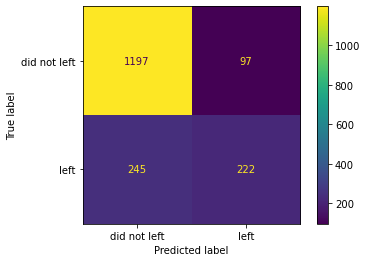

In [44]:
# ploting the confusion matrics
plot_confusion_matrix(clf_xgb,X_test,y_test,values_format='d',display_labels=['did not left','left'])

Peopele who did not leave the company the model (91%) correctly classified. but not model not performing well with people who had left the company, only(48%) corrrectly classified. XGBoost has a parameter that ```scale_pos_weight``` that helps with imbalanced data. we try to improve the accuracy by using cross validation.

Now we will evaluate the model, since this dataset is completley imbalanced so we will get accuracy by  ```roc_auc_score```.


In [45]:
print('The accuracy of the model is:',roc_auc_score(y_test,y_pred))
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

The accuracy of the model is: 0.7002066861051998
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      1294
           1       0.70      0.48      0.56       467

    accuracy                           0.81      1761
   macro avg       0.76      0.70      0.72      1761
weighted avg       0.79      0.81      0.79      1761



## XGBoost Parameters

##### max_depth [default=6]
- The maximum depth of a tree, same as GBM.
- Used to control over-fitting as higher depth will allow model to learn relations very specific to a particular sample.
- Should be tuned using CV.
- Typical values: 3-10
##### max_leaf_nodes
- The maximum number of terminal nodes or leaves in a tree.
- Can be defined in place of max_depth. Since binary trees are created, a depth of ‘n’ would produce a maximum of 2^n leaves.
- If this is defined, GBM will ignore max_depth.
#### gamma [default=0]
- A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split.
- Makes the algorithm conservative. The values can vary depending on the loss function and should be tuned.
#### max_delta_step [default=0]
- In maximum delta step we allow each tree’s weight estimation to be. If the value is set to 0, it means there is no constraint. If it is set to a positive value, it can help making the update step more conservative.
- Usually this parameter is not needed, but it might help in logistic regression when class is extremely imbalanced.
- This is generally not used but you can explore further if you wish.
#### subsample [default=1]
- Same as the subsample of GBM. Denotes the fraction of observations to be randomly samples for each tree.
- Lower values make the algorithm more conservative and prevents overfitting but too small values might lead to under-fitting.
- Typical values: 0.5-1
#### colsample_bytree [default=1]
- Similar to max_features in GBM. Denotes the fraction of columns to be randomly samples for each tree.
- Typical values: 0.5-1
#### colsample_bylevel [default=1]
- Denotes the subsample ratio of columns for each split, in each level.
- I don’t use this often because subsample and colsample_bytree will do the job for you. but you can explore further if you feel so.
#### lambda [default=1]
- L2 regularization term on weights (analogous to Ridge regression)
- This used to handle the regularization part of XGBoost. Though many data scientists don’t use it often, it should be explored to reduce overfitting.
#### alpha [default=0]
- L1 regularization term on weight (analogous to Lasso regression)
- Can be used in case of very high dimensionality so that the algorithm runs faster when implemented
#### scale_pos_weight [default=1]
- A value greater than 0 should be used in case of high class imbalance as it helps in faster convergence.
 

### Gridsearch Cv

In [46]:
param_grid={'max_depth':[3,4,5],
            'gamma':[0,0.25,1.0],
            'learning_rate':[0.1,0.5,1.0],
            'reg_lambda':[1,10,20],
            'scale_pos_weight':[1,3,5],
    
}

In [47]:
optimal_param= GridSearchCV(estimator=xgb.XGBClassifier(objective='binary:logistic',seed=42,
                                                        subsample=0.9,colsample_bytree=0.5,use_label_encoder=False),
                            param_grid=param_grid,
                            scoring='roc_auc',
                            verbose=2, 
                            cv=3)

In [48]:
# fitting the gridsearch
optimal_param.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='auc',eval_set=[(X_test,y_test)],verbose=False)

Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.1s
[CV] END gamma=0, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.1s
[CV] END g

[CV] END gamma=0, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_po

[CV] END gamma=0, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=3, reg_lambda=1, scale_p

[CV] END gamma=0, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.1s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.1s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3, reg_lambda=1, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=3,

[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.3s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.1s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=3, reg_lambda=1, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5,

[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.1s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=0.5, max_depth=5, reg_lambda=20, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.

[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.0, max_depth=5, reg_lambda=20, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=0.25, learning_rate=1.

[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.4s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.1s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.3s
[CV] END gamma=1.0, learning_rate=0.1, max_depth=5, reg_lambda=20, scale_pos_weight=1; total time=   0.2s
[CV] END gamma=1.0, learning_rate=0.1, max_dep

[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=0.5, max_dept

[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=1, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=1; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=3; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth=5, reg_lambda=10, scale_pos_weight=5; total time=   0.0s
[CV] END gamma=1.0, learning_rate=1.0, max_depth

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.5,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                    

In [49]:
# Printing the best parameter
print(optimal_param.best_params_)

{'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 3}


### Building model, evaluating the model

In [52]:
# After getting the best parameter, now we will biuld the final classifier model
clf_classifier= xgb.XGBClassifier(objective='binary:logistic',
                                  gamma=1.0,
                                  learning_rate=0.1,
                                  max_depth=3,
                                  reg_lambda=10,
                                  scale_pos_weight=3,
                                  subsample=0.9, 
                                  colsample_bytree=0.50,
                                  use_label_encoder=False)

In [53]:
# fitting the model
clf_classifier.fit(X_train,y_train,early_stopping_rounds=10,eval_metric='aucpr',eval_set=[(X_test,y_test)])

[0]	validation_0-aucpr:0.52166
[1]	validation_0-aucpr:0.61012
[2]	validation_0-aucpr:0.60563
[3]	validation_0-aucpr:0.61296
[4]	validation_0-aucpr:0.61505
[5]	validation_0-aucpr:0.61431
[6]	validation_0-aucpr:0.61931
[7]	validation_0-aucpr:0.62261
[8]	validation_0-aucpr:0.62296
[9]	validation_0-aucpr:0.62339
[10]	validation_0-aucpr:0.62399
[11]	validation_0-aucpr:0.62399
[12]	validation_0-aucpr:0.63023
[13]	validation_0-aucpr:0.62841
[14]	validation_0-aucpr:0.62948
[15]	validation_0-aucpr:0.63128
[16]	validation_0-aucpr:0.63139
[17]	validation_0-aucpr:0.63402
[18]	validation_0-aucpr:0.63455
[19]	validation_0-aucpr:0.63596
[20]	validation_0-aucpr:0.63609
[21]	validation_0-aucpr:0.63613
[22]	validation_0-aucpr:0.64345
[23]	validation_0-aucpr:0.64387
[24]	validation_0-aucpr:0.64503
[25]	validation_0-aucpr:0.64214
[26]	validation_0-aucpr:0.64540
[27]	validation_0-aucpr:0.65382
[28]	validation_0-aucpr:0.65461
[29]	validation_0-aucpr:0.65068
[30]	validation_0-aucpr:0.65604
[31]	validation_0-

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=1.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=10, scale_pos_weight=3,
              subsample=0.9, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [55]:
# Predicting the model
y_pred= clf_classifier.predict(X_test)

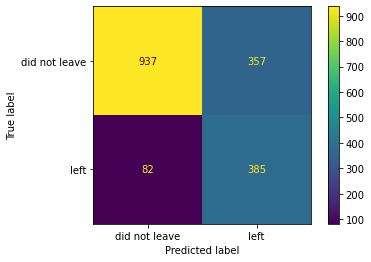

In [54]:
# Plotting the confusion matrics
plot_confusion_matrix(clf_classifier,X_test,y_test,values_format='d',display_labels=['did not leave','left'])

We see the total people **1294** and people did not leave the company **937**(72%) correctly classified.out of **467** and left the company **385**(83%) correctly classified. 

In [56]:
# Priting the accuracy and the model and lassification report
print('The accuracy of the model:',roc_auc_score(y_test,y_pred))


The accuracy of the model: 0.7742612088737676


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1294
           1       0.52      0.82      0.64       467

    accuracy                           0.75      1761
   macro avg       0.72      0.77      0.72      1761
weighted avg       0.81      0.75      0.76      1761



**We improe the correctly classified, who left the company from 52 % to 82%**